## IMPORTING NECESSARY LIBRARIES FOR STOCK ESTIMATION

In [ ]:
import numpy as np # used for arrays
import matplotlib.pyplot as plt # used for plotting graphs
import pandas as pd # reading and accessing csv files and dataframes
import matplotlib as mpl
from matplotlib import style
from sklearn import preprocessing

# our models are taken from these packages
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # regression methods
from sklearn.svm import SVR  # support vector regression

from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
from sklearn.metrics import mean_absolute_error,mean_squared_error

from google.colab.patches import cv2_imshow
import cv2

%matplotlib inline

In [ ]:
df = pd.read_csv("GOOG2.csv")  # reading csv file

In [ ]:
df.head()  # the dataset contains following factors

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-01,2689.600098,2722.219971,2667.570068,2683.360107,2683.360107,1232000
1,2022-03-02,2692.165039,2712.310059,2668.649902,2695.030029,2695.030029,1198300
2,2022-03-03,2719.570068,2734.275879,2668.620117,2686.159912,2686.159912,989000
3,2022-03-04,2667.649902,2683.979980,2608.169922,2642.439941,2642.439941,1222300
4,2022-03-07,2638.080078,2638.080078,2528.199951,2529.290039,2529.290039,1958900


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
17,2022-03-24,2785.449951,2827.929932,2760.788086,2826.239990,2826.239990,1027200
18,2022-03-25,2835.080078,2839.189941,2793.989990,2830.429932,2830.429932,963500
19,2022-03-28,2813.689941,2839.530029,2796.562988,2839.000000,2839.000000,1188700
20,2022-03-29,2863.209961,2883.250000,2849.679932,2865.000000,2865.000000,1433900
21,2022-03-30,2857.399902,2869.610107,2843.360107,2852.889893,2852.889893,1052300


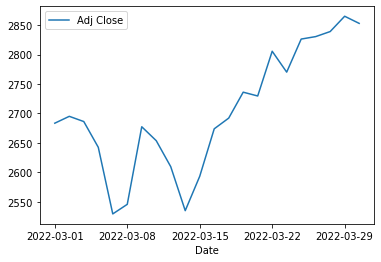

In [ ]:
df.plot('Date','Adj Close')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Day'] = df['Date'].dt.day  # extracting DD from the format of date DD-MM-YYYY

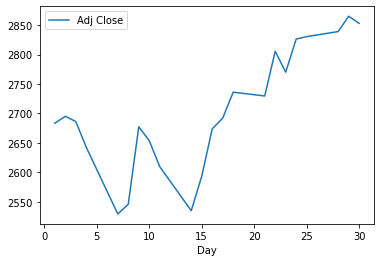

In [ ]:
df.plot('Day','Adj Close')

In [ ]:
df  # Added 'dd part' from date to the Day column

,Date,Open,High,Low,Close,Adj Close,Volume,Day
0,2022-03-01,2689.600098,2722.219971,2667.570068,2683.360107,2683.360107,1232000,1
1,2022-03-02,2692.165039,2712.310059,2668.649902,2695.030029,2695.030029,1198300,2
2,2022-03-03,2719.570068,2734.275879,2668.620117,2686.159912,2686.159912,989000,3
3,2022-03-04,2667.649902,2683.979980,2608.169922,2642.439941,2642.439941,1222300,4
4,2022-03-07,2638.080078,2638.080078,2528.199951,2529.290039,2529.290039,1958900,7
5,2022-03-08,2525.010010,2624.929932,2517.215088,2545.570068,2545.570068,1762500,8
6,2022-03-09,2628.000000,2683.969971,2601.760010,2677.320068,2677.320068,1612900,9
7,2022-03-10,2629.250000,2670.770020,2628.020020,2653.639893,2653.639893,1213300,10
8,2022-03-11,2679.989990,2684.000000,2605.929932,2609.510010,2609.510010,1330000,11
9,2022-03-14,2611.459961,2620.520020,2528.260010,2534.820068,2534.820068,1512700,14


## SELECTING NECESSARY FACTORS USEFUL FOR STOCK ESTIMATION

In [ ]:
X = df[['Day','Open']]  # INDEPENDENT VARIABLES
y = df['Adj Close']  # DEPENDENT VARIABLE (TO BE PREDICTED)

In [ ]:
# will be used in future during prediction of 30th day
X_temp = X
Y_temp = y

In [ ]:
# DROPPING LAST ROW SINCE WE NEED TO PREDICT ITS CLOSING PRIZE

In [ ]:
X = X[:-1]
y = y[:-1]

In [ ]:
print(X)

    Day         Open
0     1  2689.600098
1     2  2692.165039
2     3  2719.570068
3     4  2667.649902
4     7  2638.080078
5     8  2525.010010
6     9  2628.000000
7    10  2629.250000
8    11  2679.989990
9    14  2611.459961
10   15  2554.830078
11   16  2620.000000
12   17  2666.419922
13   18  2677.679932
14   21  2736.949951
15   22  2730.000000
16   23  2782.770020
17   24  2785.449951
18   25  2835.080078
19   28  2813.689941
20   29  2863.209961


In [ ]:
print(y)

0     2683.360107
1     2695.030029
2     2686.159912
3     2642.439941
4     2529.290039
5     2545.570068
6     2677.320068
7     2653.639893
8     2609.510010
9     2534.820068
10    2593.209961
11    2673.810059
12    2692.010010
13    2736.030029
14    2729.570068
15    2805.550049
16    2770.070068
17    2826.239990
18    2830.429932
19    2839.000000
20    2865.000000
Name: Adj Close, dtype: float64


### SPLITTING DATASET FOR TESTING AND TRAINING


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 45)

In [ ]:
X

,Day,Open
0,1,2689.600098
1,2,2692.165039
2,3,2719.570068
3,4,2667.649902
4,7,2638.080078
5,8,2525.010010
6,9,2628.000000
7,10,2629.250000
8,11,2679.989990
9,14,2611.459961


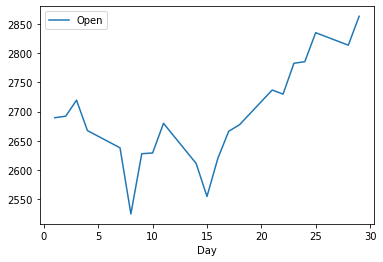

In [ ]:
X.plot('Day','Open')

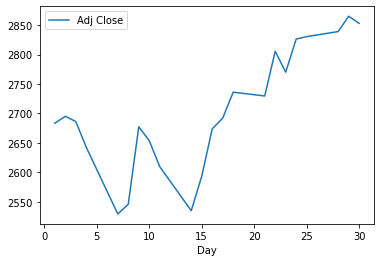

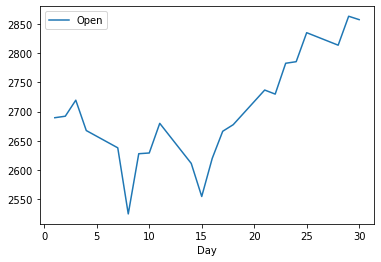

In [ ]:
df.plot('Day','Adj Close')
df.plot('Day','Open')

## MACHINE LEARNING MODELS IMPLEMENTATIONS

### 1.LINEAR REGRESSION MODEL

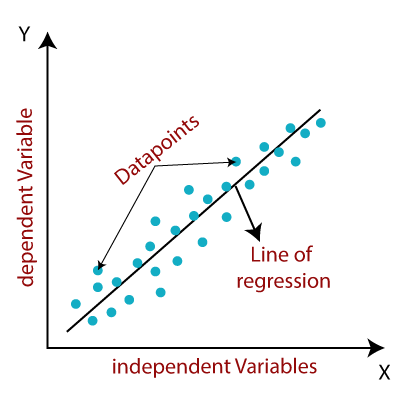

In [ ]:
img = cv2.imread('/content/LinearReg.jpg')
cv2_imshow(img)

**LINEAR REGRESSION MODEL**

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = linear_model.predict(X)

In [ ]:
y_pred

array([2655.14029447, 2660.05768488, 2686.41260625, 2644.30817582,
       2626.90015408, 2532.02204116, 2623.60841184, 2627.39097985,
       2673.88447516, 2622.85295738, 2576.68393973, 2635.63077714,
       2678.39596072, 2690.81738296, 2750.08005919, 2746.78589288,
       2795.0313478 , 2800.04797706, 2845.58363669, 2835.23486102,
       2880.67549594])

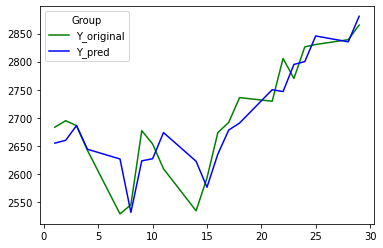

In [ ]:
plt.plot(X['Day'] ,y,label = 'Y_original',color='green')
plt.plot(X['Day'] , y_pred,label = 'Y_pred',color='blue')
plt.legend(title='Group')
plt.show()

### Accuracy metrics for linear regression

In [ ]:
# for y_test and y_pred
score1 = linear_model.score(X,y)
print("R2 value = ", score1)
MSE1 = mean_squared_error(y, y_pred)
print("MSE  : " , MSE1)
MAE1 = mean_absolute_error(y, y_pred)
print("MAE : ", MAE1)

R2 value =  0.819865280080885
MSE  :  1754.0412818129157
MAE :  32.732996647921546


### --------------------------------------------------------------------------------------------------------------------------------------

### 2. RIDGE REGRESSION MODEL

In [ ]:
# CHOOSING BEST ALPHA VALUE
from sklearn.linear_model import Ridge , RidgeCV  # 1

In [ ]:
# most widely used alpha values
regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])
model_cv = regr_cv.fit(X_train, y_train)
# View best alpha
print(model_cv.alpha_)
alpha = model_cv.alpha_

10.0


In [ ]:
ridge_model = Ridge(alpha) # We import Ridge() Function" from sklearn.linear_model  # 2

In [ ]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10.0)

In [ ]:
y_pred2 = ridge_model.predict(X) # where X is total dataset considered for regression

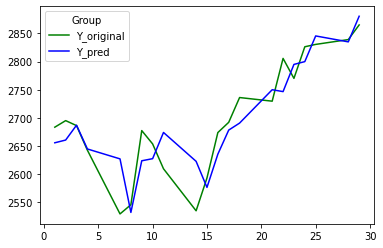

In [ ]:
plt.plot(X['Day'] ,y,label = 'Y_original',color='green')
plt.plot(X['Day'] , y_pred2,label = 'Y_pred',color='blue')
plt.legend(title='Group')
plt.show()

### Accuracy metrics for Ridge regression

In [ ]:
score2 = ridge_model.score(X,y)
print("R-squared:", score2)
print("MSE:", mean_squared_error(y, y_pred2))
print("RMSE:", mean_squared_error(y, y_pred2,squared=False))
print("MAE:", mean_absolute_error(y, y_pred2))

R-squared: 0.8198057071144496
MSE: 1754.6213667762966
RMSE: 41.88820080614941
MAE: 32.77165598271499


### --------------------------------------------------------------------------------------------------------------------------------------

### 3.LASSO REGRESSION

In [ ]:
lasso_model = Lasso(alpha)  # We import Lasso() Function" from sklearn.linear_model


In [ ]:
lasso_model.fit(X_train,y_train) # training model

Lasso(alpha=10.0)

In [ ]:
y_pred3 = lasso_model.predict(X)  # where X is total dataset considered for regression

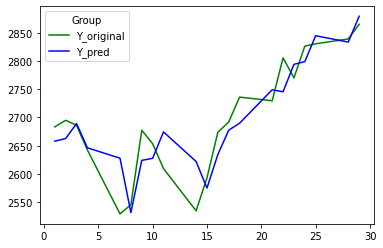

In [ ]:
plt.plot(X['Day'] ,y,label = 'Y_original',color='green')
plt.plot(X['Day'] , y_pred3,label = 'Y_pred',color='blue')
plt.legend(title='Group')
plt.show()

### Accuracy metrics for Lasso regression

In [ ]:
score3 = lasso_model.score(X,y)
print("R-squared:", score3)
print("MSE:", mean_squared_error(y, y_pred3))
print("RMSE:", mean_squared_error(y, y_pred3,squared=False))
print("MAE:", mean_absolute_error(y, y_pred3))

R-squared: 0.8193560308503836
MSE: 1759.0000380895067
RMSE: 41.94043440511205
MAE: 32.9288937738214


### 4. SUPPORT VECTOR REGRESSION

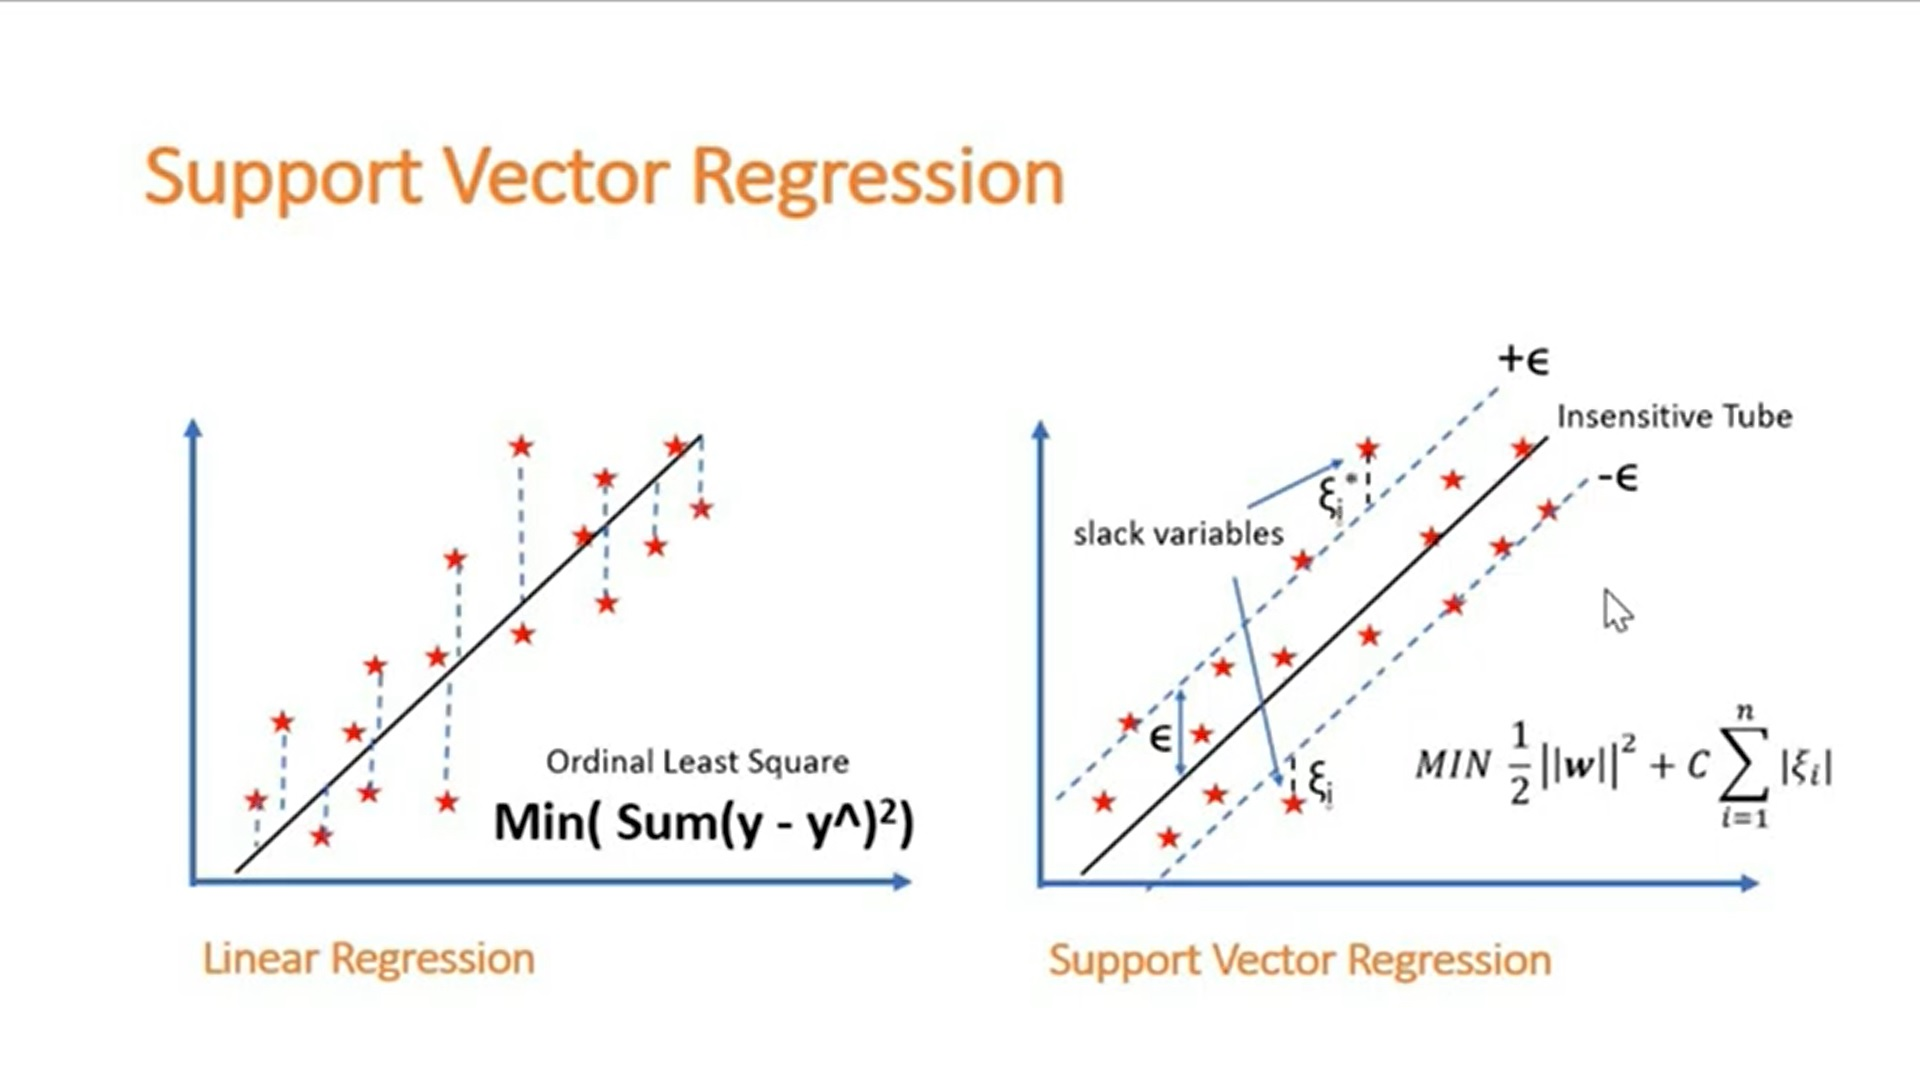

In [ ]:
img = cv2.imread("/content/svr.jpg")
cv2_imshow(img)

**SUPPORT VECTOR REGRESSION**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01],'C': [1, 10, 100, 1000, 10000]}]
print("Tuning hyper-parameters")

svr_rbf = GridSearchCV(SVR(), parameters)

Tuning hyper-parameters


In [ ]:
# Training model
svr_rbf.fit(X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid=[{'C': [1, 10, 100, 1000, 10000],
                          'gamma': [0.0001, 0.001, 0.01], 'kernel': ['rbf']}])

In [ ]:
print("The best parameters are %s" % (svr_rbf.best_params_))

The best parameters are {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [ ]:
# predict model
y_pred4 = svr_rbf.predict(X)

In [ ]:
days = X['Day'].to_numpy()
print(days)

[ 1  2  3  4  7  8  9 10 11 14 15 16 17 18 21 22 23 24 25 28 29]


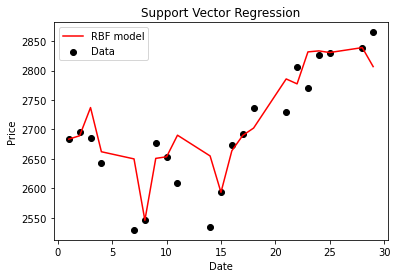

In [ ]:
# plotting predicted value vs original values
plt.scatter(days, y, color= 'black', label= 'Data')
plt.plot(days, svr_rbf.predict(X),color= 'red', label= 'RBF model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [ ]:
score4 = svr_rbf.score(X,y)
print("R-squared:", score4)
print("MSE:", mean_squared_error(y, y_pred4))
print("RMSE:", mean_squared_error(y, y_pred4,squared=False))
print("MAE:", mean_absolute_error(y, y_pred4))

R-squared: 0.7475238626348137
MSE: 2458.4575800270895
RMSE: 49.5828355383906
MAE: 32.493934490968165


#### LETS FIND THE BEST MODEL AND PREDICT THE VALUE OF 3OTH DAY OF THE MONTH AS IT IS OUR AIM OF PROJECT

In [ ]:
best_score = max(score1,score2,score3,score4)
index = np.argmax([score1,score2,score3,score4])
best_model = {0:'Linear Regression Model',
              1:'Ridge Regression Model',
              2:'Lasso Regression Model' ,
              3:'Support Vector Regression Model'}
print("The Best Performer is {0} with the score of {1}%.".format(best_model[index], best_score*100))


The Best Performer is Linear Regression Model with the score of 81.9865280080885%.


### --------------------------------------------------------------------------------------------------------------------------------------

### FINAL ESTIMATION OF 3OTH DAY OF MONTH

In [ ]:
Y_temp.tail(1)

21    2852.889893
Name: Adj Close, dtype: float64

In [ ]:
# predict 30th date and opening price
if(index == 0):
    print(linear_model.predict(X_temp.tail(1)))
elif(index == 1):
    print(ridge_model.predict(X_temp.tail(1)))
elif(index == 2) :
    print(lasso_model.predict(X_temp.tail(1)))
else:
    print(svr_rbf.predict(X_temp.tail(1)))

[2878.36508097]
